In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
pd.set_option('display.max_columns', None)

In [2]:
sample_sub_data = pd.read_csv("sample_submission.csv")
sample_sub_data

FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'

In [5]:
test_data = pd.read_csv("test.csv")
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [6]:
train_data = pd.read_csv("train.csv")
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
cat_data = train_data.select_dtypes("object")
cat_data[["Deck", "Num", "Side"]] = cat_data["Cabin"].str.split("/", expand=True)
cat_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,F,1,S
...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther,A,98,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley,G,1499,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon,G,1500,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre,E,608,S


In [8]:
num_data = train_data.select_dtypes("float")
num_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


## Data exploration

### `General Information`

(0.0, 6000.0)

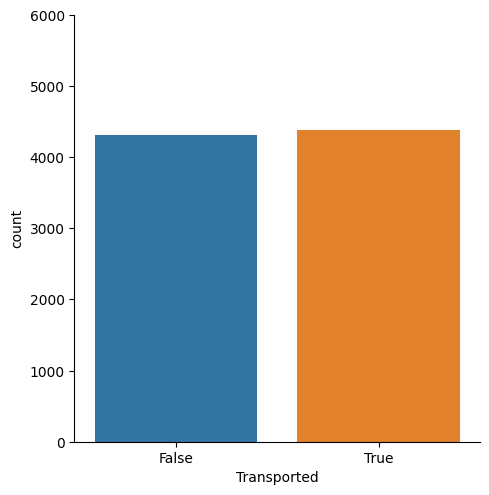

In [7]:
sns.catplot(x = "Transported", kind="count", data=train_data)
plt.ylim(0, 6000)

We have about the same amount of people who got transported and not. So, the data is indeed balanced and accuracy is a good metric to choose while we build the models.

#### General Numerical Data Exploration

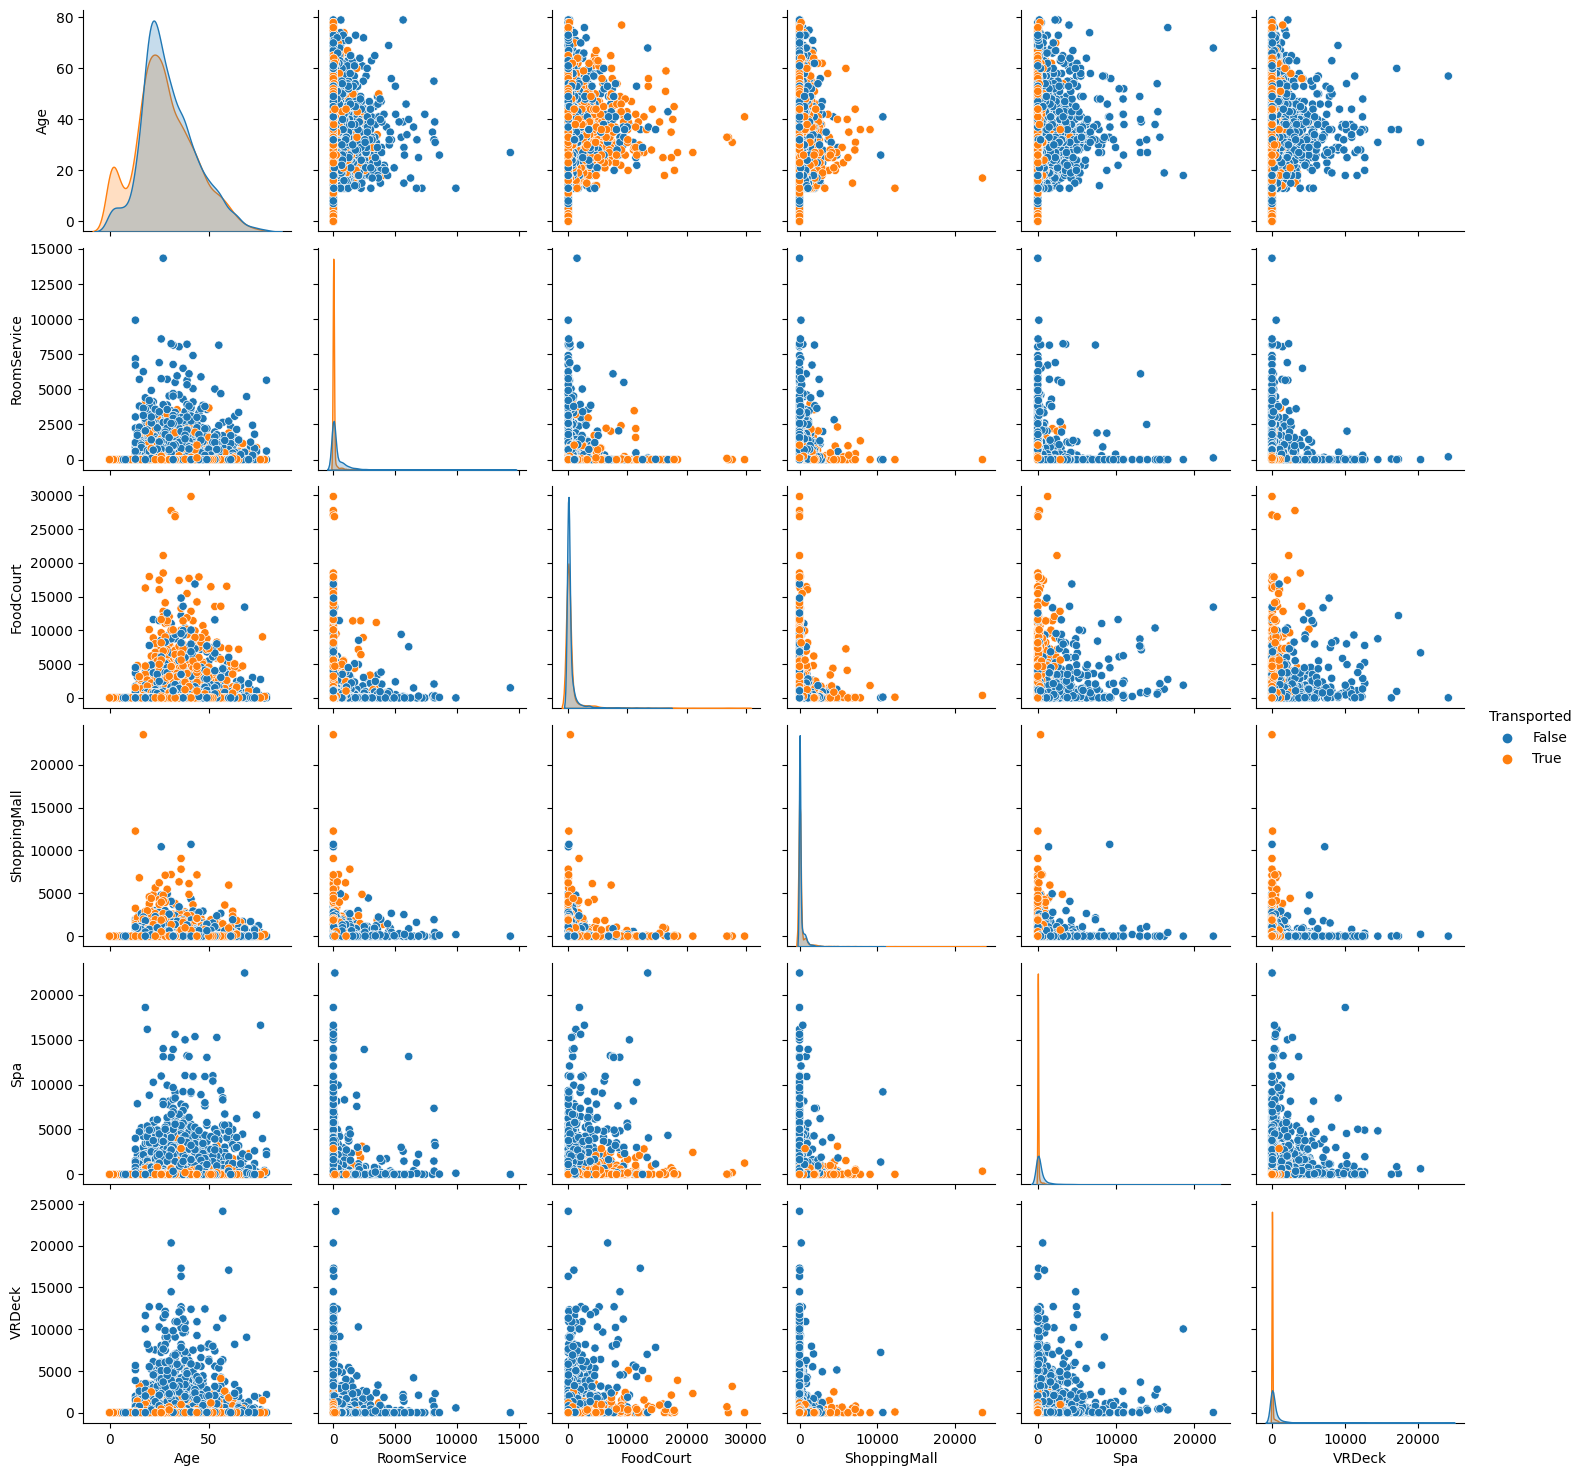

In [8]:
t = num_data
t["Transported"] = train_data["Transported"]
sns.pairplot(data=t, hue="Transported")

We can see from the plots, that's more people was **transported**, who less paid for **VRDeck**, **Spa** and **RoomService**.

#### General Categorical Data Exploration

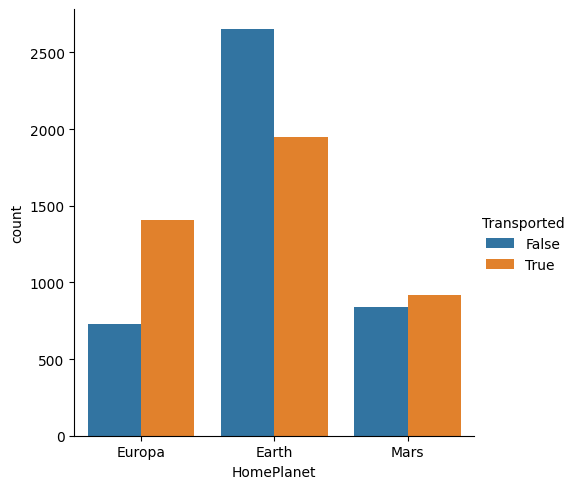

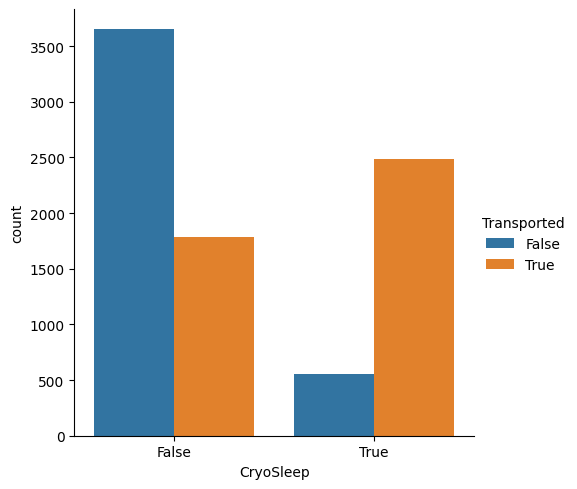

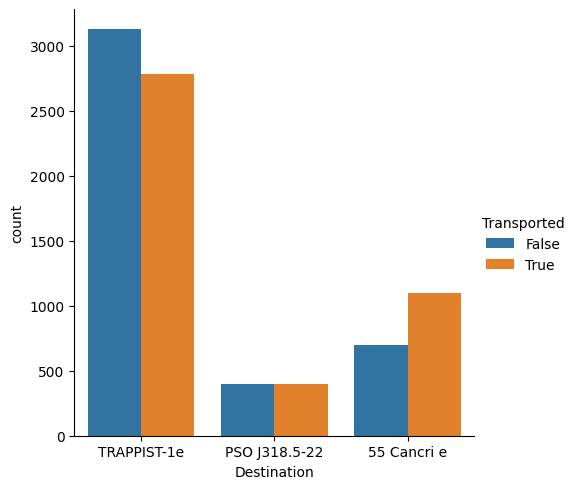

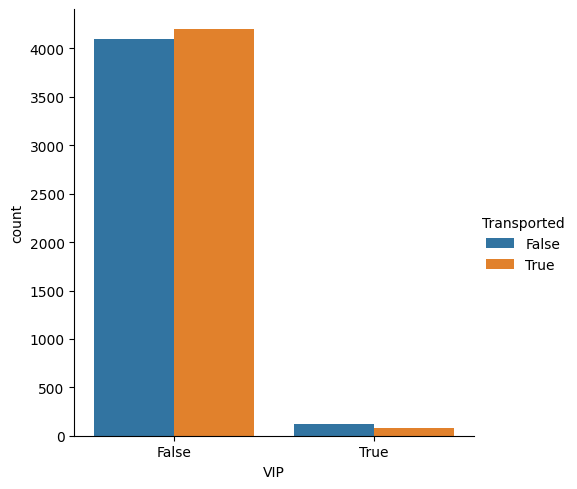

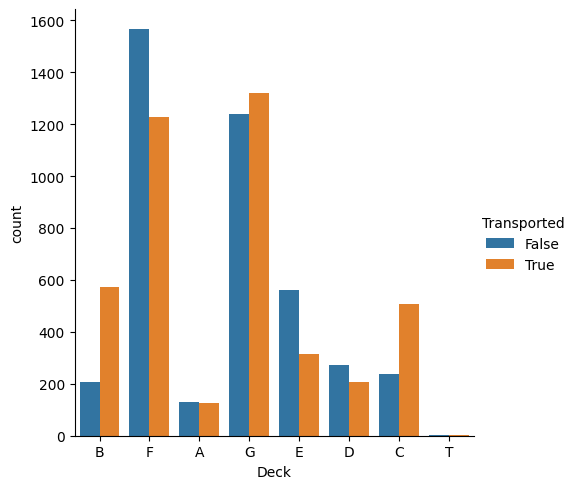

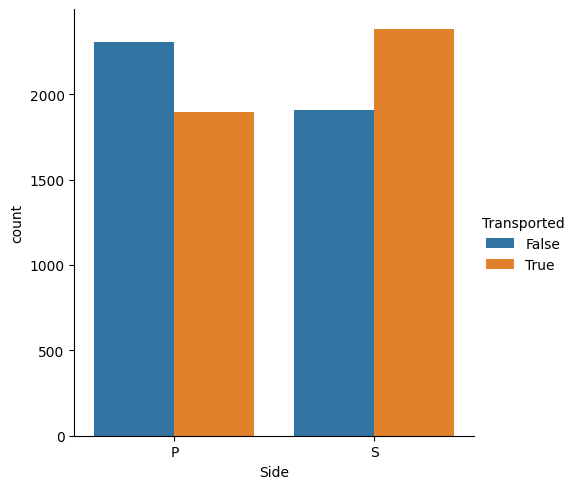

In [9]:
t = cat_data
t["Transported"] = train_data["Transported"]
t = t.drop(["PassengerId", "Name", "Num", "Cabin"], axis=1)
s = t
for i in range(0, len(t.columns)-1):
    sns.catplot(data=t, x=t.columns[i], kind="count", hue="Transported")

In [23]:
t = num_data
t["GCosts"] = t["RoomService"] + t["Spa"] + t["VRDeck"]
t["BCosts"] = t["FoodCourt"] + t["ShoppingMall"]
t = t.drop(["RoomService", "Spa", "VRDeck", "FoodCourt", "ShoppingMall"], axis=1)
t

,Age,Transported,GCosts,BCosts
0,39.0,False,0.0,0.0
1,24.0,True,702.0,34.0
2,58.0,False,6807.0,3576.0
3,33.0,False,3522.0,1654.0
4,16.0,True,870.0,221.0
...,...,...,...,...
8688,41.0,False,1717.0,6819.0
8689,18.0,False,0.0,0.0
8690,26.0,True,1.0,1872.0
8691,32.0,False,3588.0,1049.0


In [22]:
print(cat_data.columns, num_data.columns, s.columns, t.columns)
s = s.drop("Transported", axis=1)
g = s
for i in t.columns:
    g[i] = t[i]
g

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Deck', 'Num', 'Side', 'Transported'],
      dtype='object') Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'GCosts', 'BCosts'],
      dtype='object') Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'Age',
       'Transported', 'GCosts', 'BCosts'],
      dtype='object') Index(['Age', 'Transported', 'GCosts', 'BCosts'], dtype='object')


,HomePlanet,CryoSleep,Destination,VIP,Deck,Side,Age,GCosts,BCosts,Transported
0,Europa,False,TRAPPIST-1e,False,B,P,39.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,False,F,S,24.0,702.0,34.0,True
2,Europa,False,TRAPPIST-1e,True,A,S,58.0,6807.0,3576.0,False
3,Europa,False,TRAPPIST-1e,False,A,S,33.0,3522.0,1654.0,False
4,Earth,False,TRAPPIST-1e,False,F,S,16.0,870.0,221.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,True,A,P,41.0,1717.0,6819.0,False
8689,Earth,True,PSO J318.5-22,False,G,S,18.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,False,G,S,26.0,1.0,1872.0,True
8691,Europa,False,55 Cancri e,False,E,S,32.0,3588.0,1049.0,False


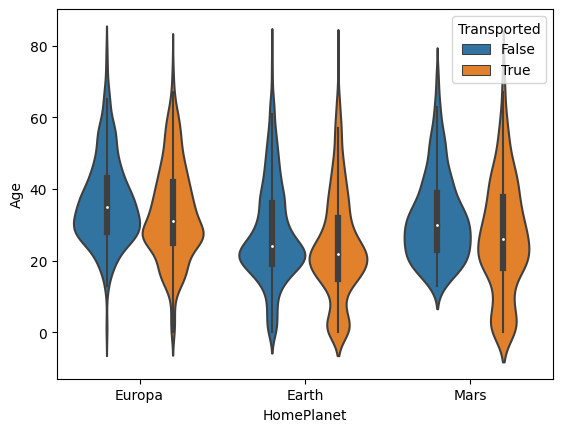

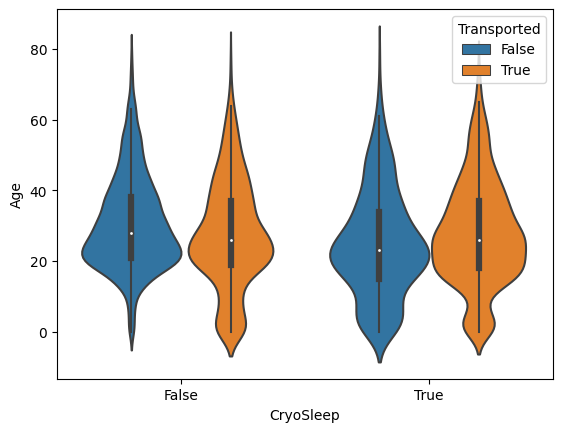

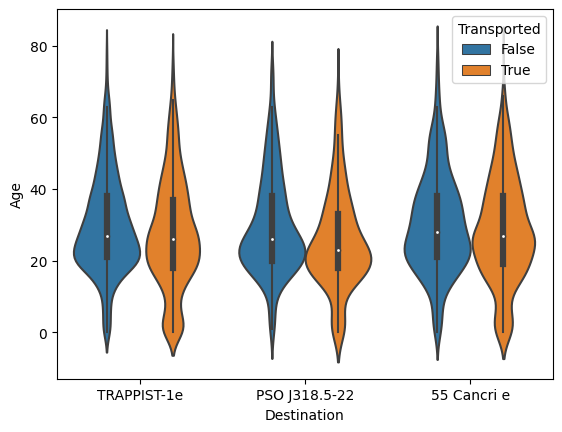

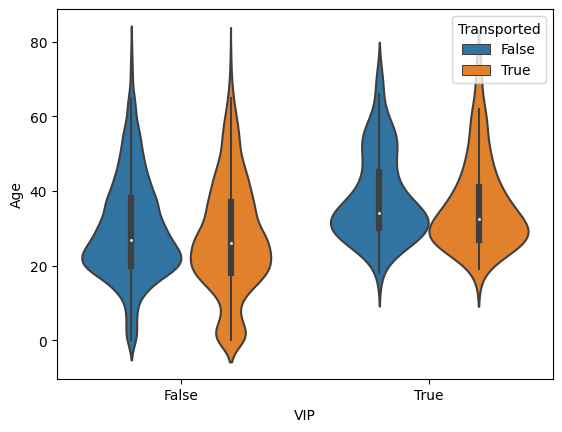

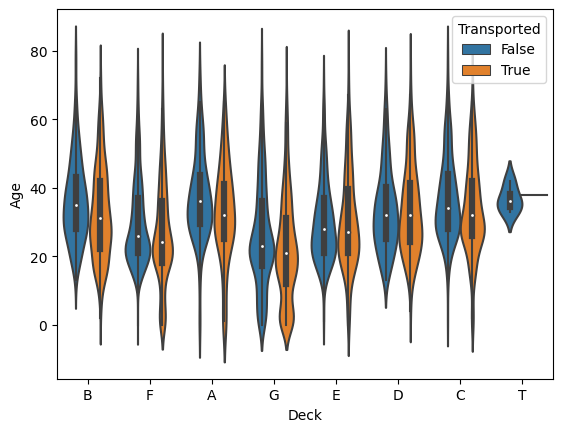

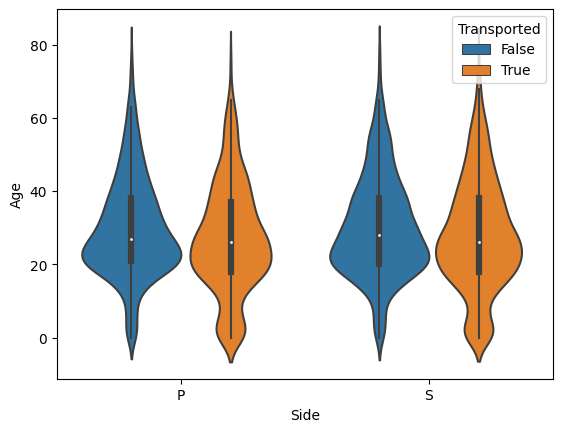

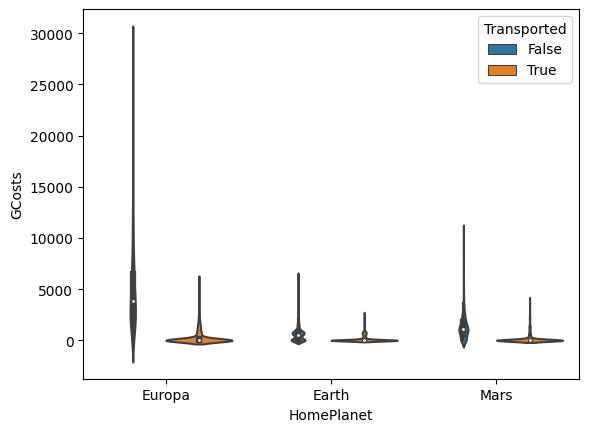

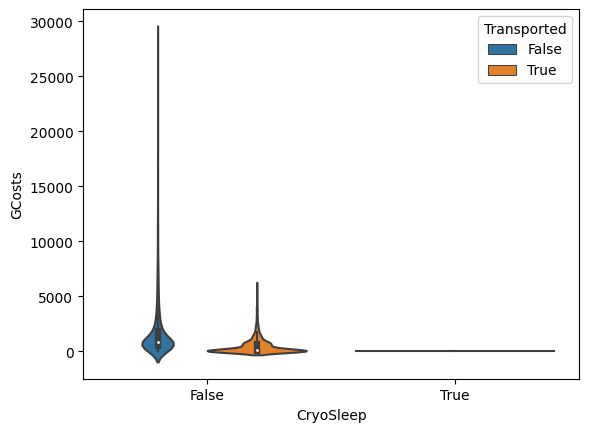

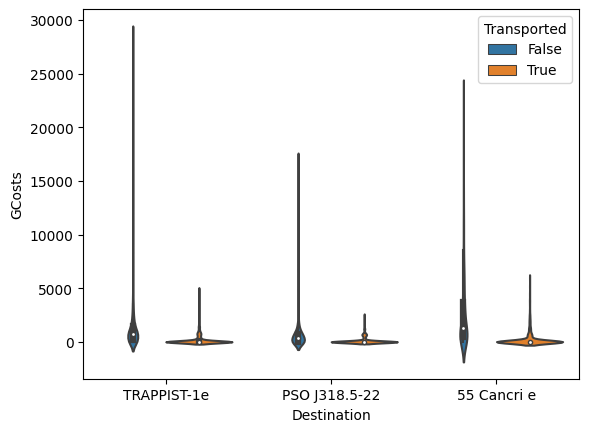

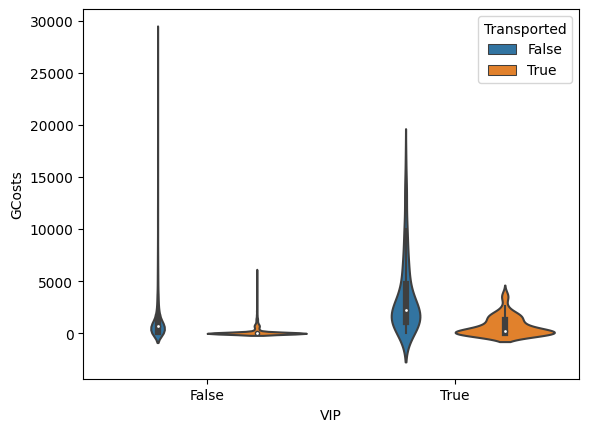

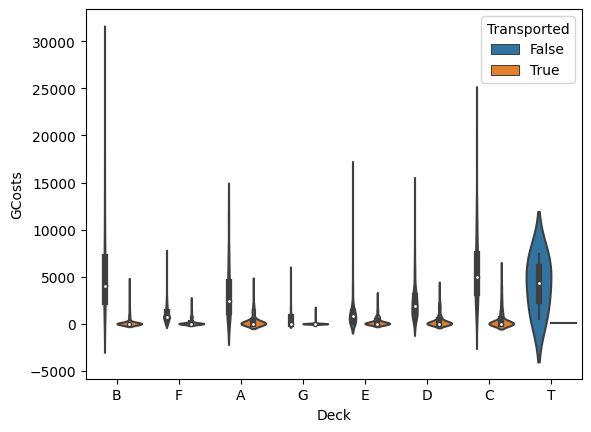

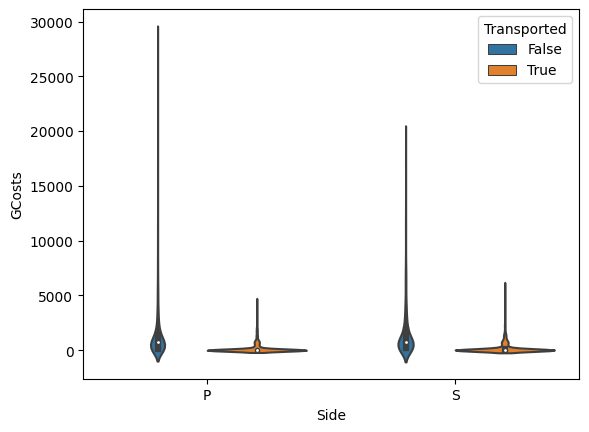

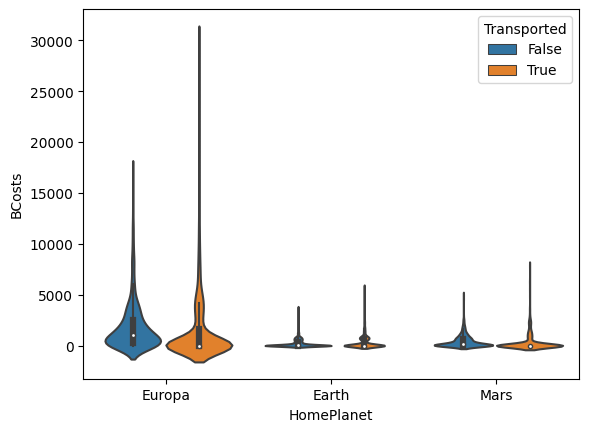

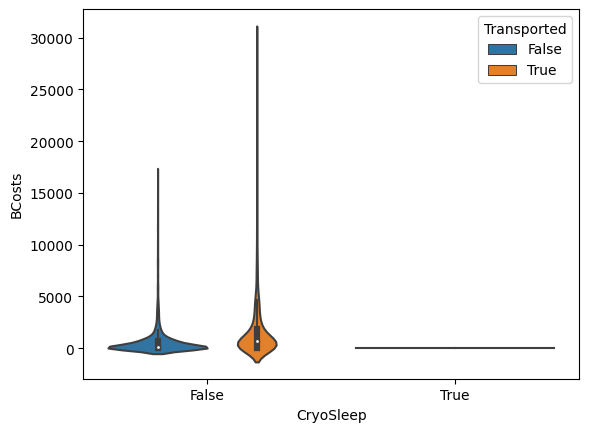

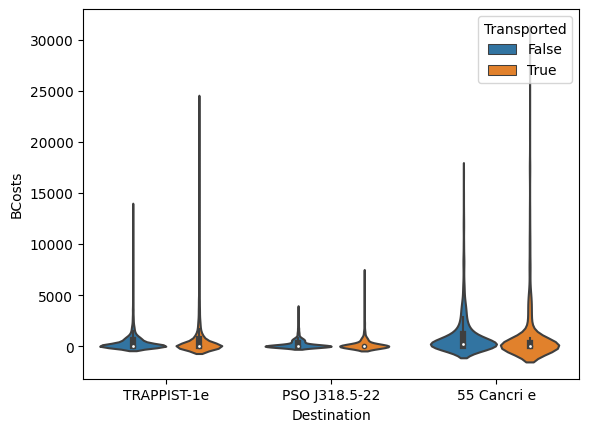

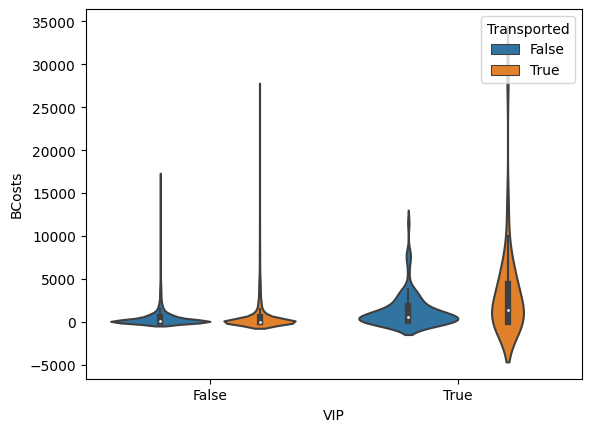

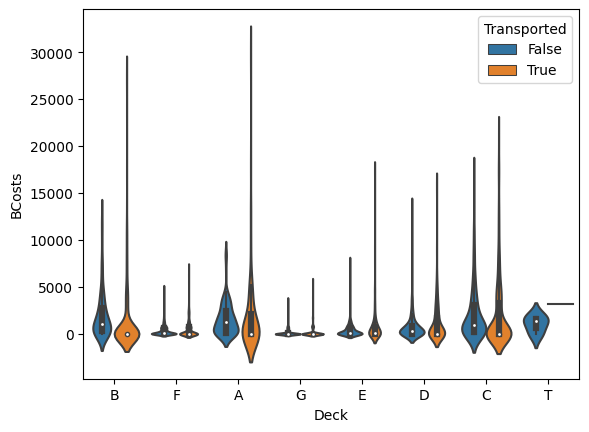

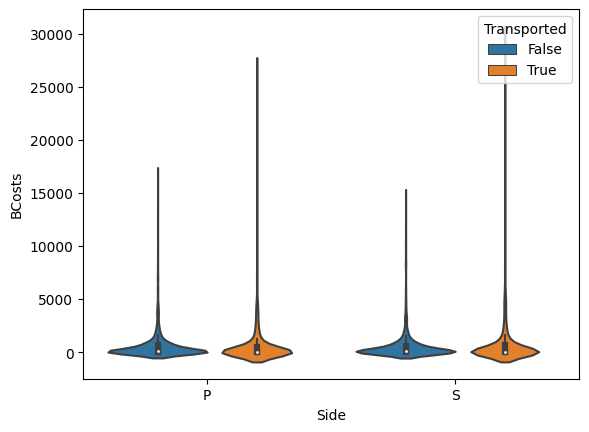

In [30]:
for i in t.drop("Transported", axis=1).columns:
    for j in cat_data.drop(["Transported", "Name", "Cabin", "PassengerId", "Num"], axis=1).columns:
        sns.violinplot(hue=g["Transported"], y=g[i], x=g[j])
        plt.show()

### `PassengerId` and `Name`

**PassengerId** and **Name** columns consist of data that are almost unique for each object. All information that we can get from this, is that people with an equal surname and passengers from one group are usually located in one place (not always). It's more relevant to drop these columns.

## Data preprocessing

In [64]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [38]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,2.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,6.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,6.0,S


In [65]:
train_data[["Deck", "Num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)
train_data["HomePlanet"] = train_data["HomePlanet"].fillna("Earth")
train_data["Destination"] = train_data["Destination"].fillna("TRAPPIST-1e")
train_data["VIP"] = train_data["VIP"].fillna("False")
train_data["Side"] = train_data["Side"].fillna("N")
train_data["Deck"] = train_data["Deck"].fillna("N")
train_data["CryoSleep"] = train_data["CryoSleep"].fillna("False")
train_data = train_data.drop(["PassengerId", "Name", "Cabin", "Num"], axis=1)
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [66]:
test_data[["Deck", "Num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)
test_data["HomePlanet"] = test_data["HomePlanet"].fillna("Earth")
test_data["Destination"] = test_data["Destination"].fillna("TRAPPIST-1e")
test_data["VIP"] = test_data["VIP"].fillna("False")
test_data["Side"] = test_data["Side"].fillna("N")
test_data["Deck"] = test_data["Deck"].fillna("N")
test_data["CryoSleep"] = test_data["CryoSleep"].fillna("False")
test_data = test_data.drop(["PassengerId", "Name", "Cabin", "Num"], axis=1)
test_data.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,S


In [67]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
train_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = imputer.fit_transform(train_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])
test_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = imputer.transform(test_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])

In [68]:
train_data["GCosts"] = train_data["RoomService"] + train_data["Spa"] + train_data["VRDeck"]
train_data["BCosts"] = train_data["FoodCourt"] + train_data["ShoppingMall"]
train_data = train_data.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)

test_data["GCosts"] = test_data["RoomService"] + test_data["Spa"] + test_data["VRDeck"]
test_data["BCosts"] = test_data["FoodCourt"] + test_data["ShoppingMall"]
test_data = test_data.drop(["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)

In [86]:
train_data.isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
Deck           0
Side           0
GCosts         0
BCosts         0
dtype: int64

In [87]:
test_data.isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Deck           0
Side           0
GCosts         0
BCosts         0
dtype: int64

In [88]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,GCosts,BCosts
0,Europa,False,TRAPPIST-1e,39.0,False,False,B,P,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,True,F,S,702.0,34.0
2,Europa,False,TRAPPIST-1e,58.0,True,False,A,S,6807.0,3576.0
3,Europa,False,TRAPPIST-1e,33.0,False,False,A,S,3522.0,1654.0
4,Earth,False,TRAPPIST-1e,16.0,False,True,F,S,870.0,221.0


In [91]:
train_data["CryoSleep"] = train_data["CryoSleep"] * 1
train_data["VIP"] = train_data["VIP"] * 1

test_data["CryoSleep"] = test_data["CryoSleep"] * 1
test_data["VIP"] = test_data["VIP"] * 1

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=45, learning_rate=0.25, max_depth=4, random_state=0).fit(x_train, y_train.astype('int'))
gb.score(x_test, y_test.astype('int'))
# y_pred = gb.predict(x_test)
# results(y_test, y_pred)

0.743813175322412

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train.astype('int'))
clf.score(x_test, y_test.astype('int'))

# y_pred = classifier.predict(x_test)

0.6737539212269084

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(x_train, y_train.astype('int'))
clf.score(x_test, y_test.astype('int'))

# y_pred = model.predict(x_test)

---------

In [122]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y.astype('int'))
y_pred = clf.predict(X_test)
y_pred = y_pred.astype('bool')
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [67]:
result.to_csv('results3.csv', index=False)

In [150]:
result = result.reset_index(drop=True)
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [68]:
s = pd.read_csv("results3.csv")

In [69]:
s

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
